# Neural Networks in Keras

## Load Data


### Helper Func 

In [62]:
## Classification metrics
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


def roc_fun(model_pipe, X_train, y_train, X_test, y_test):

 # roc_auc
  y_pred_proba_train = model_pipe.predict_proba(X_train)
  y_pred_proba_test = model_pipe.predict_proba(X_test)
  train_roc_auc = roc_auc_score(y_train, y_pred_proba_train[:,1])
  test_roc_auc = roc_auc_score(y_test, y_pred_proba_test[:,1])

  print(f'Training ROC AUC: {train_roc_auc:.2f}')
  print(f'Test ROC AUC: {test_roc_auc:.2f}')
  print()
  # Make figure for training and test conf matrix
  fig, axes = plt.subplots(ncols=2, figsize=(8,4))

  # Visualize the ROC curve
  RocCurveDisplay.from_estimator(model_pipe, X_train, y_train, ax=axes[0])
  axes[0].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[0].legend();
  axes[0].set_title("Training Data")

  RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1])
  axes[1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[1].legend();
  axes[1].set_title("Test Data")

  fig.suptitle('ROC Curves')
  fig.tight_layout()
  plt.show()


def evaluate_classification_combined(model, X_train, y_train, X_test, y_test,
                         figsize=(8,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )


  roc_fun(model, X_train, y_train, X_test, y_test)


  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [63]:
## nural network keras model
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes



### imports 

In [64]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Deep learning tols
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import set_config
from sklearn.compose import make_column_selector


set_config(transform_output='pandas')



In [65]:
df = pd.read_csv("C:/Users/hekmat.ashqar/Desktop/DATA Science/CodingDojo/05-IntermediateML/Week19/Data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [67]:
# Check for null values
df.isna().sum().sum()

0

In [68]:
df['HeartDisease'].value_counts(normalize = True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

## Train Test Split

In [69]:
SEED = 42 
# Make x and y variables
y = df['HeartDisease']
X = df.drop(columns=['HeartDisease'])
# train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat
362,56,M,NAP,155,0,0,ST,99,N,0.0,Flat
869,59,M,NAP,150,212,1,Normal,157,N,1.6,Up
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up
199,57,F,TA,130,308,0,Normal,98,N,1.0,Flat


In [70]:
# make list of categorical columns
ohe_cols = X_train.select_dtypes('object').columns

# instantiate preprocessors
impute_constant = SimpleImputer(strategy='constant', fill_value= 'MISSING')
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# make pipeline for categorical data
ohe_pipe = make_pipeline(impute_constant, ohe_encoder)

# make tuple for column transformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

In [71]:


# Numeric pipeline
num_cols = make_column_selector(dtype_include='number')

# Instantiate transformers within the pipeline
# Adding StandardScaler after imputation
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Make tuple for column transformer
num_tuple = ('numeric', num_pipe, num_cols)


In [72]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EAE788580>),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))],
                  verbose_feature_names_out=False)

In [73]:
# fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_tf.head(3)

C:\Users\hekmat.ashqar\AppData\Local\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.985202,0.373828,-0.061812,-0.532524,1.710544,-0.834739,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-0.080384,0.643819,2.946539,-0.532524,-0.247550,-0.834739,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
377,1.198319,1.453793,-1.878000,1.877849,-0.567238,0.259340,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Model 1

Epoch 1/30
18/18 [==============================] - 2s 50ms/step - loss: 0.6112 - accuracy: 0.6818 - val_loss: 0.5443 - val_accuracy: 0.7899
Epoch 2/30
18/18 [==============================] - 0s 4ms/step - loss: 0.5129 - accuracy: 0.8073 - val_loss: 0.4728 - val_accuracy: 0.8406
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8327 - val_loss: 0.4313 - val_accuracy: 0.8333
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8436 - val_loss: 0.4081 - val_accuracy: 0.8333
Epoch 5/30
18/18 [==============================] - 0s 4ms/step - loss: 0.3699 - accuracy: 0.8473 - val_loss: 0.3913 - val_accuracy: 0.8478
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.8545 - val_loss: 0.3811 - val_accuracy: 0.8478
Epoch 7/30
18/18 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8655 - val_loss: 0.3743 - val_accuracy: 0.8551
Epoch 8/30
18/18 [=

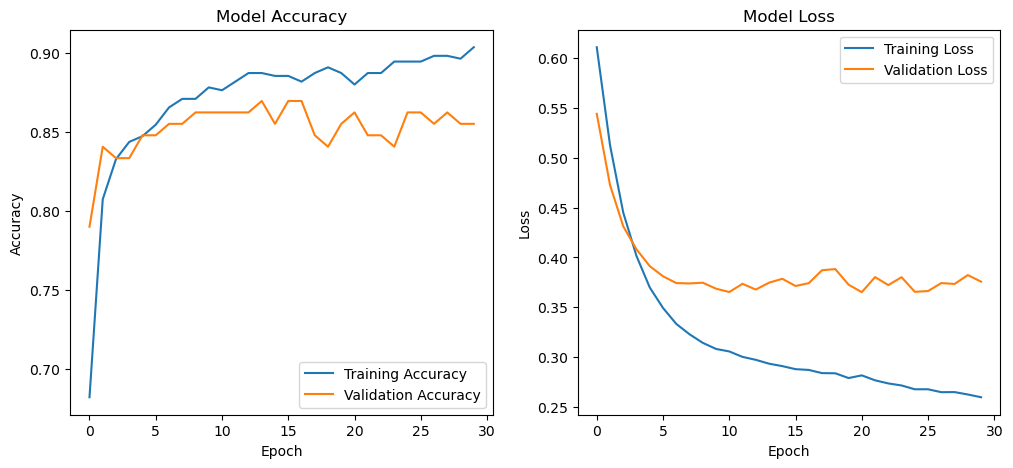

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Correcting the model architecture for binary classification
model = Sequential([
    Dense(32, input_shape=(X_train_tf.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model with binary crossentropy
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Correct loss function for binary classification
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train_tf, y_train, validation_split=0.2, epochs=30)

# Model evaluation using the correct test data variable
test_loss, test_accuracy = model.evaluate(X_test_tf, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


### Final Evaluation using model.evaluate


8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        98
           1       0.91      0.86      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



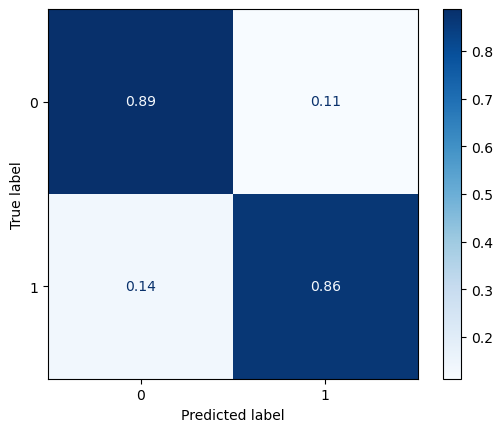

In [76]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_tf, y_test,return_dict=True)
y_pred_test = model.predict(X_test_tf)
y_pred_test = np.round(y_pred_test)


from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');



## Model 2 

In [77]:
# More complex model
model1 = Sequential([
    Dense(64, input_shape=(X_train_tf.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train_tf, y_train, validation_split=0.2, epochs=30)

Epoch 1/30
18/18 [==============================] - 1s 12ms/step - loss: 0.6258 - accuracy: 0.7236 - val_loss: 0.5218 - val_accuracy: 0.8333
Epoch 2/30
18/18 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8291 - val_loss: 0.4025 - val_accuracy: 0.8406
Epoch 3/30
18/18 [==============================] - 0s 5ms/step - loss: 0.3733 - accuracy: 0.8418 - val_loss: 0.3637 - val_accuracy: 0.8478
Epoch 4/30
18/18 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8582 - val_loss: 0.3529 - val_accuracy: 0.8623
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8727 - val_loss: 0.3516 - val_accuracy: 0.8623
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.8836 - val_loss: 0.3519 - val_accuracy: 0.8768
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.8800 - val_loss: 0.3662 - val_accuracy: 0.8333
Epoch 8/30
18/18 [=

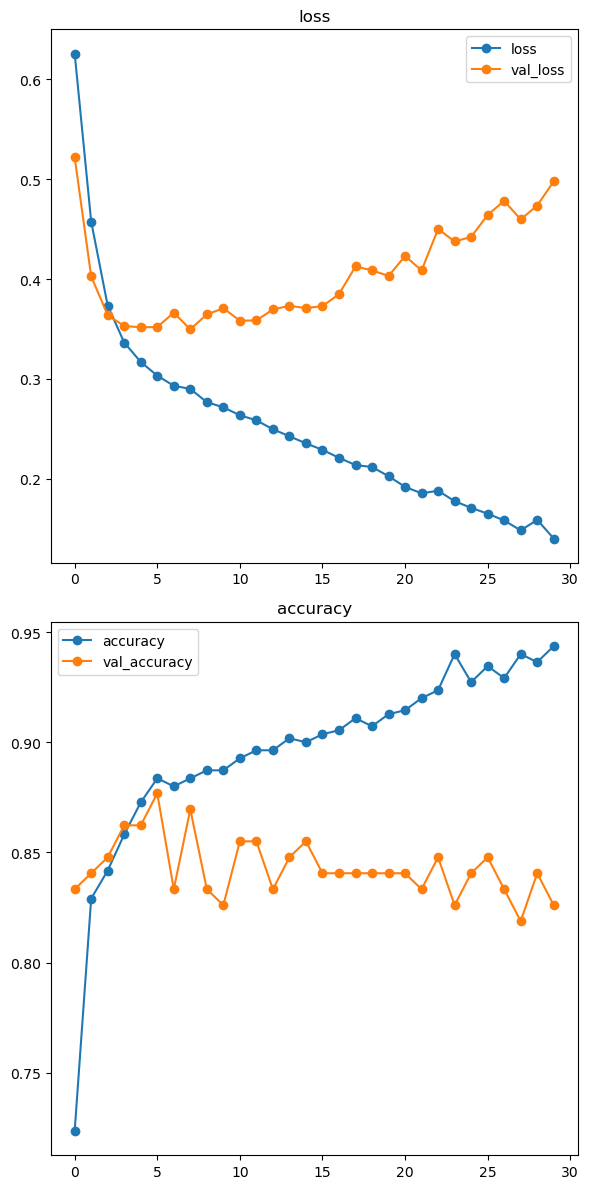

In [78]:
plot_history(history1);

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        98
           1       0.93      0.86      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.89      0.88       230
weighted avg       0.89      0.88      0.88       230



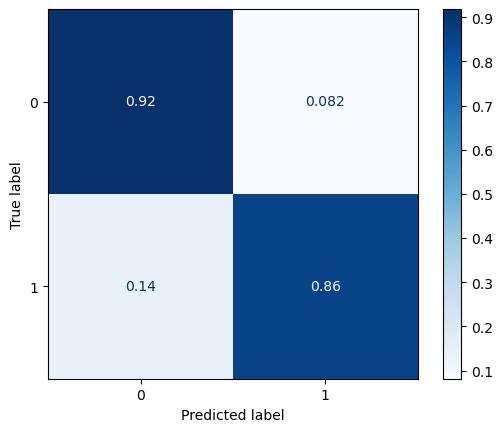

In [79]:
# Evaluate neural network with builtin evaluation
plot_history(history1);
result = model1.evaluate(X_test_tf, y_test,return_dict=True)
y_pred_test = model1.predict(X_test_tf)
y_pred_test = np.round(y_pred_test)


from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');



## model 3 

In [80]:
# Simpler model
model2 = Sequential([
    Dense(16, input_shape=(X_train_tf.shape[1],), activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train_tf, y_train, validation_split=0.2, epochs=30)


Epoch 1/30
18/18 [==============================] - 1s 10ms/step - loss: 0.9147 - accuracy: 0.4327 - val_loss: 0.7881 - val_accuracy: 0.5000
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.7898 - accuracy: 0.4436 - val_loss: 0.6955 - val_accuracy: 0.5652
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5127 - val_loss: 0.6286 - val_accuracy: 0.6522
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.6655 - val_loss: 0.5799 - val_accuracy: 0.8261
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.7436 - val_loss: 0.5432 - val_accuracy: 0.8116
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7982 - val_loss: 0.5155 - val_accuracy: 0.8188
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.8236 - val_loss: 0.4894 - val_accuracy: 0.8261
Epoch 8/30
18/18 [=

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        98
           1       0.89      0.88      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



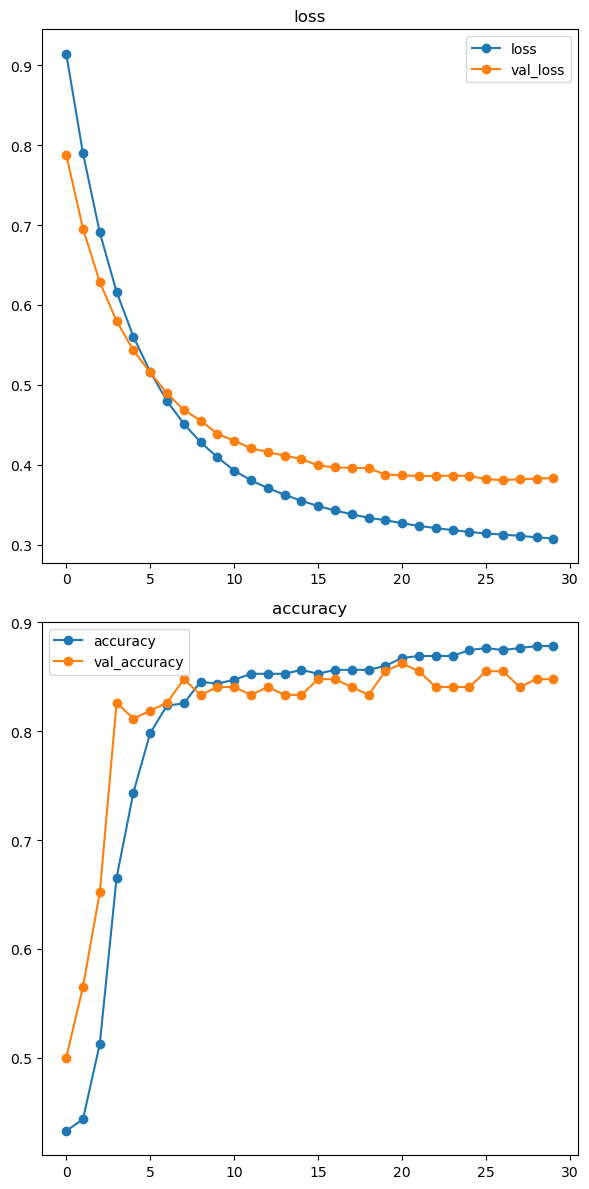

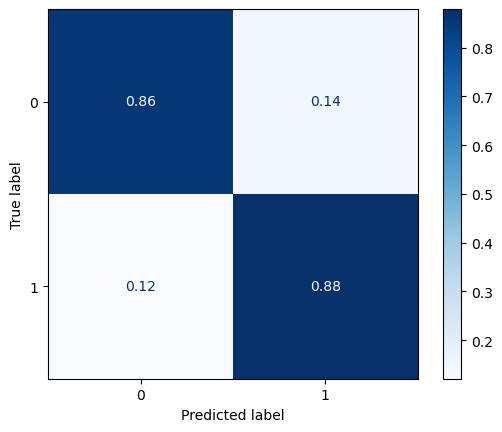

In [81]:
# Evaluate neural network with builtin evaluation
plot_history(history2);
result = model2.evaluate(X_test_tf, y_test,return_dict=True)
y_pred_test = model2.predict(X_test_tf)
y_pred_test = np.round(y_pred_test)


from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');



## model 4

In [84]:
# More complex model
model4 = Sequential([
    Dense(32, input_shape=(X_train_tf.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train_tf, y_train, validation_split=0.2, epochs=30)

Epoch 1/30
18/18 [==============================] - 1s 12ms/step - loss: 0.6428 - accuracy: 0.6673 - val_loss: 0.5960 - val_accuracy: 0.6739
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.7945 - val_loss: 0.5207 - val_accuracy: 0.7754
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.8273 - val_loss: 0.4615 - val_accuracy: 0.8043
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8400 - val_loss: 0.4292 - val_accuracy: 0.8188
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8436 - val_loss: 0.4127 - val_accuracy: 0.8116
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8527 - val_loss: 0.4025 - val_accuracy: 0.8188
Epoch 7/30
18/18 [==============================] - 0s 4ms/step - loss: 0.3416 - accuracy: 0.8618 - val_loss: 0.3975 - val_accuracy: 0.8188
Epoch 8/30
18/18 [=

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        98
           1       0.91      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



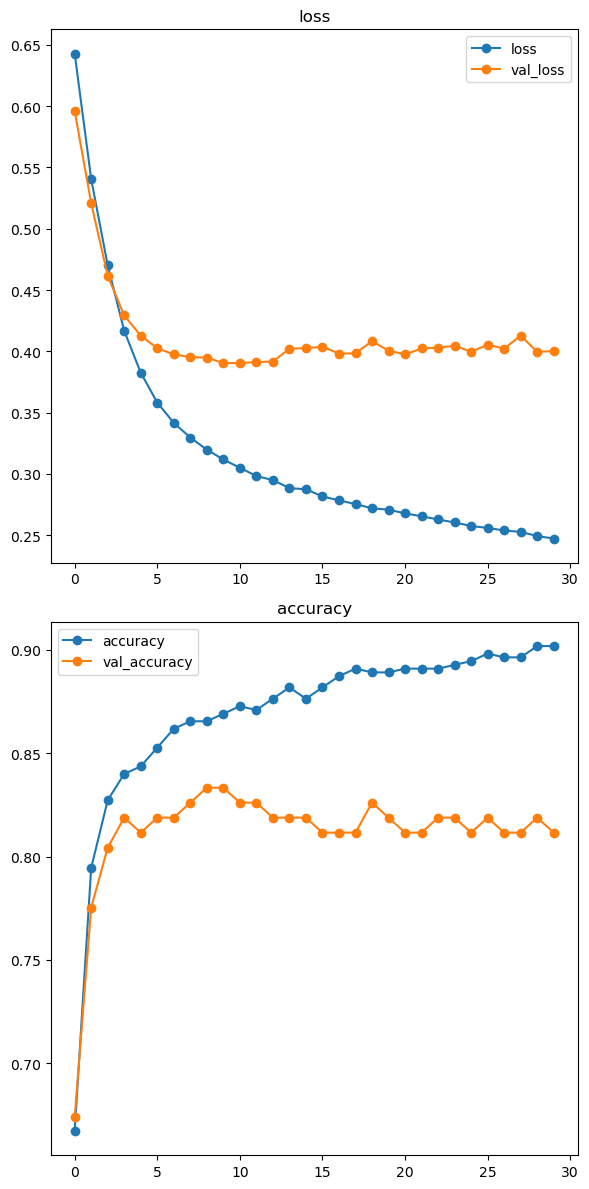

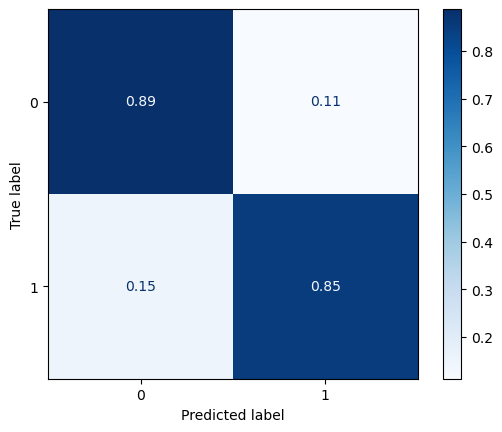

In [85]:
# Evaluate neural network with builtin evaluation
plot_history(history4);
result = model4.evaluate(X_test_tf, y_test,return_dict=True)
y_pred_test = model4.predict(X_test_tf)
y_pred_test = np.round(y_pred_test)


from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

